In [1]:
import matplotlib.pyplot as plt 
from datasets import load_dataset

preselect_dataset = load_dataset("json", data_files="/home/allanz/perplexity-correlation-data/data/selected_subsets/preselect.jsonl", split="train")

/home/allanz/miniconda3/envs/perplexity/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


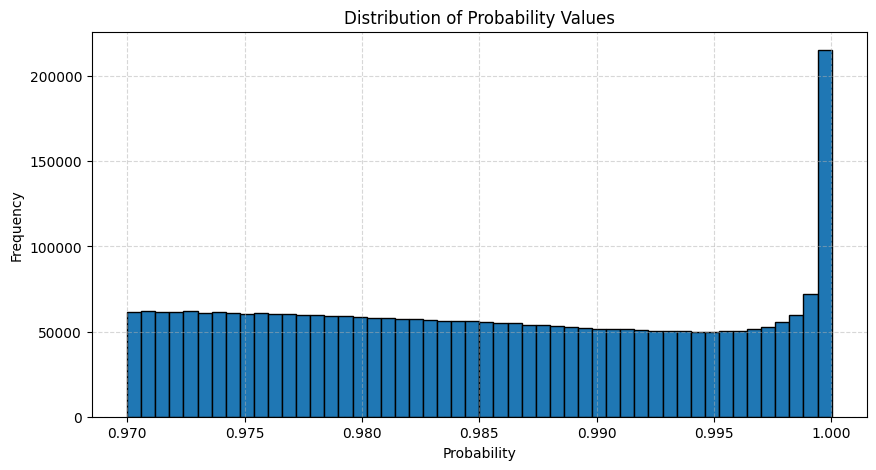

In [3]:
probs = preselect_dataset["probability"]
plt.figure(figsize=(10, 5))
plt.hist(probs, bins=50, edgecolor='black')
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Probability Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import fasttext
model = fasttext.load_model("/home/allanz/.cache/huggingface/hub/models--hkust-nlp--preselect-fasttext-classifier/snapshots/467086fdc507d674dbb041971f1e9cae3c6e2140/PreSelect-classifier.bin")

In [19]:
label, prediction  = model.predict("fdsalfiajslfdijaf", k=2)
print(label, prediction)

('__label__0', '__label__1') [0.93845505 0.06156493]


In [ ]:
random_dataset = load_dataset("json", data_files="/home/allanz/perplexity-correlation-data/data/selected_subsets/random.jsonl", split="train")

Generating train split: 3478000 examples [00:19, 180056.06 examples/s]


In [8]:
negative_samples = random_dataset.filter(lambda example: "0" in example["label"])


Filter: 100%|██████████| 3478000/3478000 [00:22<00:00, 153658.92 examples/s]


In [13]:
positive_samples = random_dataset.filter(lambda example: "1" in example["label"])

Filter: 100%|██████████| 3478000/3478000 [00:22<00:00, 154020.96 examples/s]


In [15]:
negative_probs = negative_samples["probability"]
positive_probs = positive_samples["probability"]

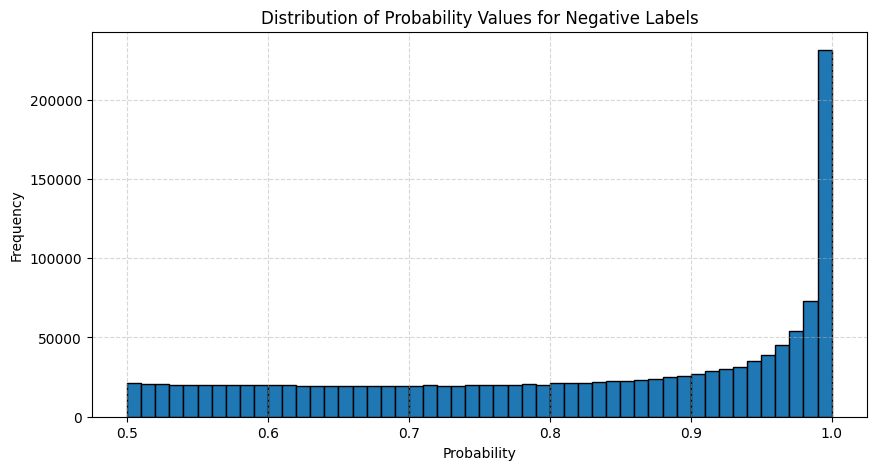

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(negative_probs, bins=50, edgecolor='black')
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Probability Values for Negative Labels")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

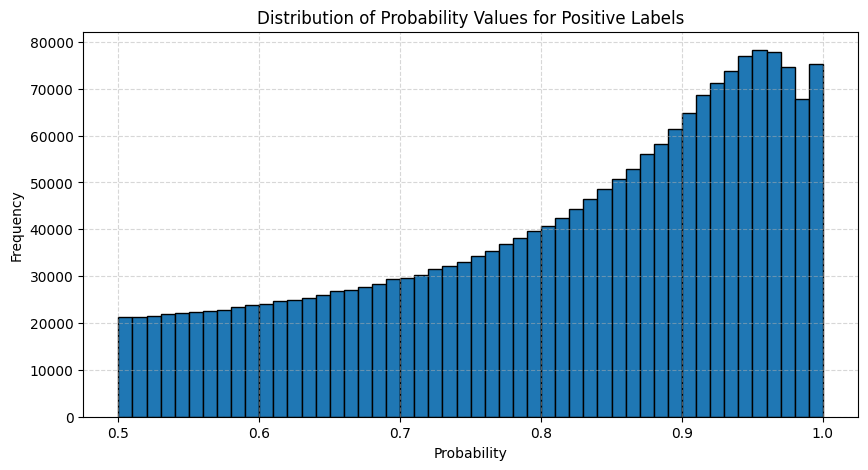

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(positive_probs, bins=50, edgecolor='black')
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Probability Values for Positive Labels")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()